In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv
/kaggle/input/jobchange-solution/jobchange_test_target_values.npy


In [109]:
import pandas as pd

train_df = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
test_df = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv')

In [110]:
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [111]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [112]:
train_df.shape

(19158, 14)

<AxesSubplot:>

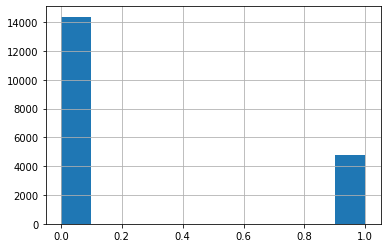

In [113]:
#we have an imbalanced dataset

train_df['target'].hist()

In [114]:
train_df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [115]:
train_df.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


In [116]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [117]:
# calculate how much Nan values are presents in the trainset
train_df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [118]:
# get the different values in each columns
for col in train_df:
    print(col,': ',train_df[col].unique())

enrollee_id :  [ 8949 29725 11561 ... 24576  5756 23834]
city :  ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_7

## deal with categorical variable and Nan values

In [119]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [120]:
# # city col
# train_df['city'] = train_df['city'].str.extract('(\d+)')
# test_df['city'] = test_df['city'].str.extract('(\d+)')

# #convert col to numeric
# train_df["city"] = pd.to_numeric(train_df["city"])
# test_df["city"] = pd.to_numeric(test_df["city"])

#drop city column
#after many experiments i found that this irrelevent feature
train_df = train_df.drop(columns=['city'])
train_df = train_df.drop(columns=['enrollee_id'])

#save the enrollee_id
test_id = test_df['enrollee_id']

test_df = test_df.drop(columns=['enrollee_id'])
test_df = test_df.drop(columns=['city'])

In [121]:
#relevent_experience col
exp = LabelEncoder()
train_df['relevent_experience'] = exp.fit_transform(train_df['relevent_experience'])
test_df['relevent_experience'] = exp.transform(test_df['relevent_experience'])

pickle.dump(exp, open('exp.pkl', 'wb'))

<AxesSubplot:>

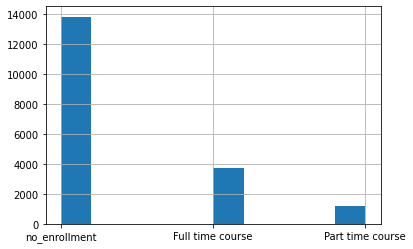

In [122]:
#enrolled_university col

#get the most frequent value in enrolled_university column
train_df['enrolled_university'].hist()

In [123]:
#replace nan value
train_df['enrolled_university'] = train_df['enrolled_university'].replace(np.nan, 'no_enrollment')
test_df['enrolled_university'] = test_df['enrolled_university'].replace(np.nan, 'no_enrollment')

enrol = LabelEncoder()
train_df['enrolled_university'] = enrol.fit_transform(train_df['enrolled_university'])
test_df['enrolled_university'] = enrol.transform(test_df['enrolled_university'])

pickle.dump(enrol, open('enrol.pkl', 'wb'))

<AxesSubplot:>

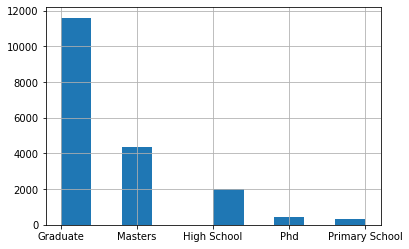

In [124]:
#education_level col

train_df['education_level'].hist()

In [125]:
#replace nan value
train_df['education_level'] = train_df['education_level'].replace(np.nan, 'Graduate')
test_df['education_level'] = test_df['education_level'].replace(np.nan, 'Graduate')

edu = LabelEncoder()
train_df['education_level'] = edu.fit_transform(train_df['education_level'])
test_df['education_level'] = edu.transform(test_df['education_level'])

pickle.dump(edu, open('edu.pkl', 'wb'))

<AxesSubplot:>

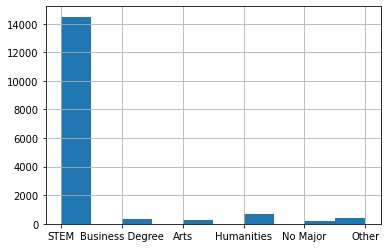

In [126]:
#major_discipline  col

train_df['major_discipline'].hist()

In [127]:
#replace nan value
# train_df['major_discipline'] = train_df['major_discipline'].replace(np.nan, 'STEM')
# test_df['major_discipline'] = test_df['major_discipline'].replace(np.nan, 'STEM')

#add another major discipline 'U' for Nan value
train_df['major_discipline'] = train_df['major_discipline'].replace(np.nan, 'U')
test_df['major_discipline'] = test_df['major_discipline'].replace(np.nan, 'U')

maj = LabelEncoder()
train_df['major_discipline'] = maj.fit_transform(train_df['major_discipline'])
test_df['major_discipline'] = maj.transform(test_df['major_discipline'])

pickle.dump(maj, open('maj.pkl', 'wb'))

<AxesSubplot:>

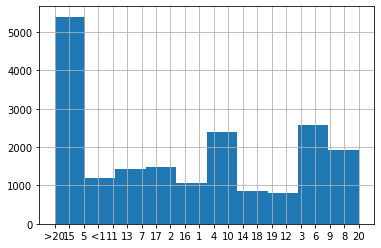

In [128]:
#experience   col

train_df['experience'].hist()

In [129]:
#replace nan value
train_df['experience'] = train_df['experience'].replace(np.nan, '21')
test_df['experience'] = test_df['experience'].replace(np.nan, '21')

#replace <1 by 0 and >20 by 25
train_df['experience'] = train_df['experience'].replace( '>20','21')
test_df['experience'] = test_df['experience'].replace('>20', '21')

train_df['experience'] = train_df['experience'].replace( '<1','0')
test_df['experience'] = test_df['experience'].replace('<1', '0')

#convert col to numeric
train_df["experience"] = pd.to_numeric(train_df["experience"])
test_df["experience"] = pd.to_numeric(test_df["experience"])


<AxesSubplot:>

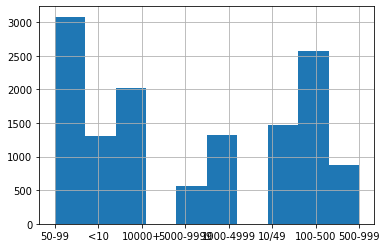

In [130]:
#company_size col

train_df['company_size'].hist()

In [131]:
#replace nan value
train_df['company_size'] = train_df['company_size'].replace(np.nan, '50-99')
test_df['company_size'] = test_df['company_size'].replace(np.nan, '50-99')

#replace interval by integer
train_df['company_size'] = train_df['company_size'].replace('50-99', 2)
test_df['company_size'] = test_df['company_size'].replace('50-99', 2)

train_df['company_size'] = train_df['company_size'].replace('<10', 0)
test_df['company_size'] = test_df['company_size'].replace('<10', 0)

train_df['company_size'] = train_df['company_size'].replace('10000+', 7)
test_df['company_size'] = test_df['company_size'].replace('10000+', 7)

train_df['company_size'] = train_df['company_size'].replace('5000-9999', 6)
test_df['company_size'] = test_df['company_size'].replace('5000-9999', 6)

train_df['company_size'] = train_df['company_size'].replace('1000-4999', 5)
test_df['company_size'] = test_df['company_size'].replace('1000-4999', 5)

train_df['company_size'] = train_df['company_size'].replace('10/49', 1)
test_df['company_size'] = test_df['company_size'].replace('10/49', 1)

train_df['company_size'] = train_df['company_size'].replace('100-500', 3)
test_df['company_size'] = test_df['company_size'].replace('100-500', 3)

train_df['company_size'] = train_df['company_size'].replace('500-999', 4)
test_df['company_size'] = test_df['company_size'].replace('500-999', 4)

<AxesSubplot:>

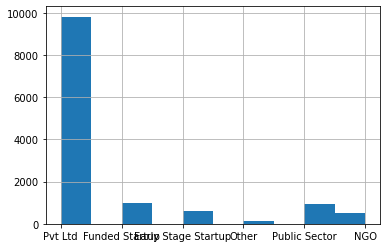

In [132]:
#company_type col

train_df['company_type'].hist()

In [133]:
#add another company type 'U' for Nan value
train_df['company_type'] = train_df['company_type'].replace(np.nan, 'U')
test_df['company_type'] = test_df['company_type'].replace(np.nan, 'U')

typ = LabelEncoder()
train_df['company_type'] = typ.fit_transform(train_df['company_type'])
test_df['company_type'] = typ.transform(test_df['company_type'])

pickle.dump(typ, open('typ.pkl', 'wb'))

<AxesSubplot:>

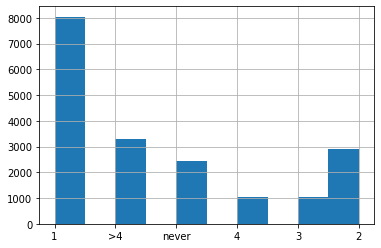

In [134]:
#last_new_job  col

train_df['last_new_job'].hist()

In [135]:
#replace nan value
train_df['last_new_job'] = train_df['last_new_job'].replace(np.nan, '1')
test_df['last_new_job'] = test_df['last_new_job'].replace(np.nan, '1')

#replace never by 0 and >4 by 5
train_df['last_new_job'] = train_df['last_new_job'].replace('never',0)
test_df['last_new_job'] = test_df['last_new_job'].replace('never',0)

train_df['last_new_job'] = train_df['last_new_job'].replace('>4',5)
test_df['last_new_job'] = test_df['last_new_job'].replace('>4',5)

#convert col to numeric
train_df["last_new_job"] = pd.to_numeric(train_df["last_new_job"])
test_df["last_new_job"] = pd.to_numeric(test_df["last_new_job"])


<AxesSubplot:>

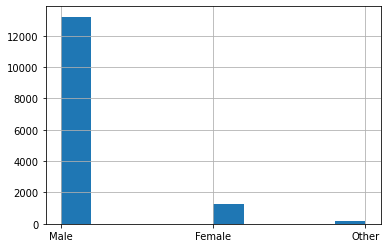

In [136]:
#gender  col

train_df['gender'].hist()

In [137]:
#replace nan value
#add another gender 'U' for Nan value
train_df['gender'] = train_df['gender'].replace(np.nan, 'U')
test_df['gender'] = test_df['gender'].replace(np.nan, 'U')

gen = LabelEncoder()
train_df['gender'] = gen.fit_transform(train_df['gender'])
test_df['gender'] = gen.transform(test_df['gender'])

pickle.dump(gen, open('gen.pkl', 'wb'))

In [138]:
#avoid data leakage

x_df = train_df.iloc[:, train_df.columns != 'target']
y_df = train_df['target']

# create new features 

In [139]:
# I try to create new features using featuretools but it doesn't improve the performance

In [140]:
# import featuretools as ft


# # Create Entity
# es = ft.EntitySet(id = 'Turnover')
# es.entity_from_dataframe(entity_id = 'hr', dataframe = x_df)

# # Run deep feature synthesis with transformation primitives
# feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'hr',
#                                       trans_primitives = ['add_numeric', 'multiply_numeric'], 
#                                       verbose=True)

In [141]:
# x_df_new = feature_matrix.copy()
# x_df_new.head()

## split data

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(x_df, y_df,train_size = 0.9,random_state = 0)

In [143]:
X_train.shape

(17242, 11)

In [144]:
X_test.shape

(1916, 11)

## deal with the unalanced dataset

In [145]:
from imblearn.over_sampling import SMOTE 

In [146]:
#oversampling using SMOT
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

<AxesSubplot:>

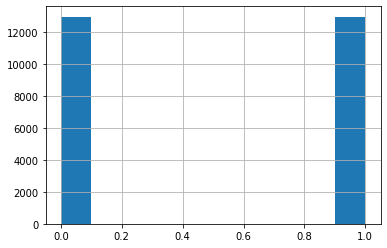

In [147]:
y_train.hist()

In [148]:
# #Combination of SMOTE with ENN doesn't improve the performance

# from imblearn.combine import SMOTEENN

# smt = SMOTEENN(random_state=42)
# X_train, y_train = smt.fit_resample(X_train, y_train)

## implement the model

In [149]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

### Standarization

In [150]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

In [151]:
X_train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.550,3,0,2,0,5,6,4,5,1,62
1,0.920,1,1,2,2,5,21,2,6,5,7
2,0.920,1,1,0,1,6,9,2,6,1,59
3,0.920,0,0,2,3,5,21,3,1,1,61
4,0.698,3,1,0,1,6,2,2,6,1,15


### SVM model with standarization

accurary on training set:  0.7042133745651333
accurary on test set:  0.7218162839248434


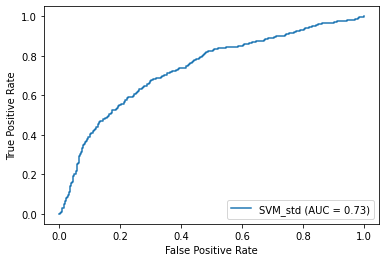

In [152]:
from sklearn.svm import SVC
clf_lin_std = SVC(kernel='linear').fit(X_train_std, y_train)
print("accurary on training set: ",clf_lin_std.score(X_train_std, y_train))
print("accurary on test set: ",clf_lin_std.score(X_test_std, y_test))

plot_roc_curve(clf_lin_std, X_test_std, y_test, name = 'SVM_std')

In [153]:
y_pred = clf_lin_std.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[1104,  342],
       [ 191,  279]])

accurary on training set:  0.7701198299188249
accurary on test set:  0.721294363256785


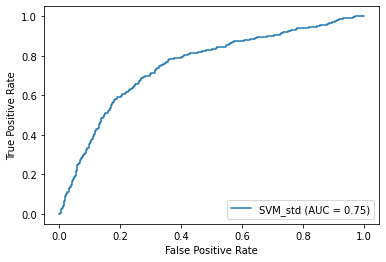

In [154]:
from sklearn.svm import SVC
clf_rbf_std = SVC(kernel='rbf').fit(X_train_std, y_train)
print("accurary on training set: ",clf_rbf_std.score(X_train_std, y_train))
print("accurary on test set: ",clf_rbf_std.score(X_test_std, y_test))

plot_roc_curve(clf_rbf_std, X_test_std, y_test, name = 'SVM_std')

In [155]:
y_pred = clf_rbf_std.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[1068,  378],
       [ 156,  314]])

### DecisionTree

accurary on training set:  0.9984538074990337
accurary on test set:  0.6920668058455115


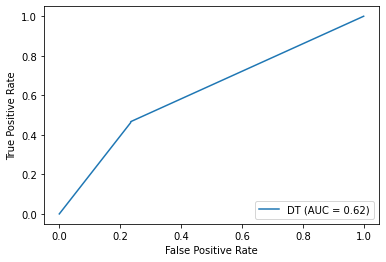

In [156]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train_std, y_train)

print("accurary on training set: ",dtc.score(X_train_std, y_train))
print("accurary on test set: ",dtc.score(X_test_std, y_test))

plot_roc_curve(dtc, X_test_std, y_test, name = 'DT')

In [157]:
y_pred = dtc.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[1107,  339],
       [ 251,  219]])

### RandomForest

accurary on training set:  0.8217240046385775
accurary on test set:  0.7510438413361169


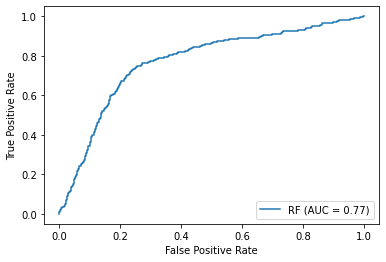

In [158]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=10,max_features=4,n_estimators=1000)
RF.fit(X_train_std, y_train)

print("accurary on training set: ",RF.score(X_train_std, y_train))
print("accurary on test set: ",RF.score(X_test_std, y_test))


plot_roc_curve(RF, X_test_std, y_test, name = 'RF')

In [159]:
y_pred = RF.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[1095,  351],
       [ 126,  344]])

In [160]:
print("Classification Report :",classification_report(y_test,y_pred))

Classification Report :               precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      1446
         1.0       0.49      0.73      0.59       470

    accuracy                           0.75      1916
   macro avg       0.70      0.74      0.71      1916
weighted avg       0.80      0.75      0.76      1916



In [161]:
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), RF.feature_importances_), X_train.columns), 
             reverse=True))

Features sorted by their score:
[(0.4092, 'city_development_index'), (0.1049, 'company_size'), (0.0836, 'company_type'), (0.0774, 'experience'), (0.0767, 'major_discipline'), (0.0755, 'education_level'), (0.0614, 'training_hours'), (0.052, 'enrolled_university'), (0.0274, 'last_new_job'), (0.023, 'gender'), (0.0089, 'relevent_experience')]


### I try to use random search for tune the FR parameters but it leads to overfit the model

In [162]:
# from sklearn.model_selection import RandomizedSearchCV

# #https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/


# # Number of trees in random forest
# n_estimators = [800, 1000, 1200, 2000, 3000, 4000]

# # Number of features to consider at every split
# max_features = [10, 30, 50, 100, 150]

# #The sub-sample size used to build each tree
# max_samples = [0.2, 0.5, 0.7]

# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(4, 100, num = 9)]
# max_depth.append(None)

# # Minimum number of samples required to split a node
# min_samples_split = [2, 4]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]


# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_samples' : max_samples,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
# print(random_grid)



In [163]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train_std, y_train)

In [164]:
# print("accurary on training set: ",rf_random.score(X_train_std, y_train))
# print("accurary on test set: ",rf_random.score(X_test_std, y_test))


# plot_roc_curve(rf_random, X_test_std, y_test, name = 'rf_random')

In [165]:
# y_pred = rf_random.predict(X_test_std)
# confusion_matrix(y_test, y_pred)

In [166]:
# rf_random.best_params_

## LGBOOST

In [167]:
from lightgbm import LGBMClassifier

accurary on training set:  0.8465403942790878
accurary on test set:  0.7781837160751566


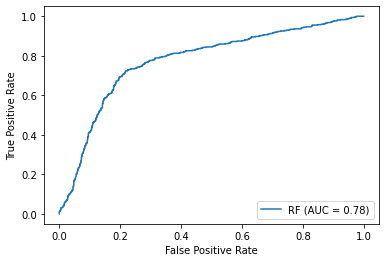

In [168]:
# fit model no training data
LGB = LGBMClassifier()
LGB.fit(X_train_std, y_train)

print("accurary on training set: ",LGB.score(X_train_std, y_train))
print("accurary on test set: ",LGB.score(X_test_std, y_test))

plot_roc_curve(LGB, X_test_std, y_test, name = 'RF')

In [169]:
y_pred = LGB.predict(X_test_std)
confusion_matrix(y_test, y_pred)

array([[1185,  261],
       [ 164,  306]])

In [170]:
print("Classification Report :",classification_report(y_test,y_pred))

Classification Report :               precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1446
         1.0       0.54      0.65      0.59       470

    accuracy                           0.78      1916
   macro avg       0.71      0.74      0.72      1916
weighted avg       0.80      0.78      0.78      1916



## model choice
finally, i decide to go with the random forest model which has the best performance and equilibrate rate of FP and FN

## testing set

In [171]:

# es.entity_from_dataframe(entity_id = 'hr_test', dataframe = test_df)


# # Use the feature definitions from earlier
# feature_matrix_enc_test = ft.calculate_feature_matrix(features=feature_defs,
#                                                       entityset=es)

# test_df = feature_matrix_enc_test.copy()

In [172]:
test_df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,1,0,0,0,5,9,0,6,1,21
1,0.920,0,0,2,0,5,5,2,5,1,98
2,0.624,1,1,2,1,6,0,2,5,0,15
3,0.827,1,0,2,2,5,11,1,5,1,39
4,0.920,1,0,2,0,5,21,7,5,5,72


In [173]:
#upload correct classification for the test set
import numpy as np
y_true_test = np.load('/kaggle/input/jobchange-solution/jobchange_test_target_values.npy')

In [174]:
test_df_std = scaler_std.transform(test_df)

In [175]:
#get prediction
predict = RF.predict(test_df_std)

In [176]:
#get probability
predict_proba = RF.predict_proba(test_df_std)

In [177]:
#accuracy
print("accurary on test set: ",RF.score(test_df_std, y_true_test))

accurary on test set:  0.733677782996712


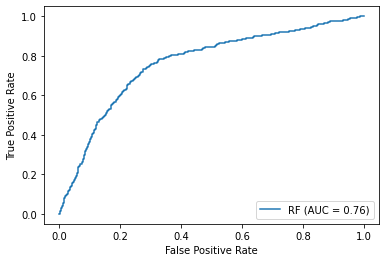

In [178]:
#plot roc curve
plot_roc_curve(RF, test_df_std, y_true_test, name = 'RF')

In [179]:
#matrice de confusion
confusion_matrix(y_true_test, predict)

array([[1168,  385],
       [ 182,  394]])

In [180]:
print("Classification Report :",classification_report(y_true_test, predict))

Classification Report :               precision    recall  f1-score   support

         0.0       0.87      0.75      0.80      1553
         1.0       0.51      0.68      0.58       576

    accuracy                           0.73      2129
   macro avg       0.69      0.72      0.69      2129
weighted avg       0.77      0.73      0.74      2129



## submission

In [182]:
submission = pd.DataFrame({'enrollee_id':test_id,'target':predict_proba[:,1]})


In [ ]:
submission.to_csv('submission.csv',index=False)

## save RF classifier

In [183]:
pickle.dump(RF, open('classifier.pkl', 'wb'))